# Morphological Transformation

# imports

In [3]:
import cv2
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
%matplotlib inline

# useful methods

In [4]:

def resize(img, scale): # resize image to scale value param
    return cv2.resize(img, (int(img.shape[1] * scale), int(img.shape[0] * scale) ) )


def scaled(img, scale): # returns new scale value
    img_shape_x, img_shape_y, channels = img.shape
    if img_shape_x > scale:
        return scale / img_shape_x
    else:
        return 1
    

def color_filter(image, lower_upper_list): # 2nd param now takes a list to handle python3
    lower = np.array(lower_upper_list[0], dtype="uint8")
    upper = np.array(lower_upper_list[1], dtype="uint8")
    
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
    
    return output, mask


# import images from dirs

In [5]:
img_folder = "../images/"

img_base_name = "1257"

img_path = img_folder + img_base_name + ".jpg"

img = cv2.imread(img_path)

img.shape

(608, 808, 3)

# show image in RGB and HSV colorspace

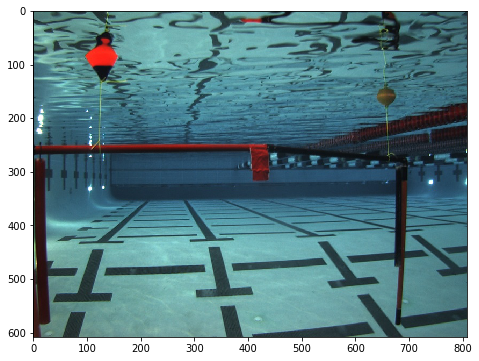

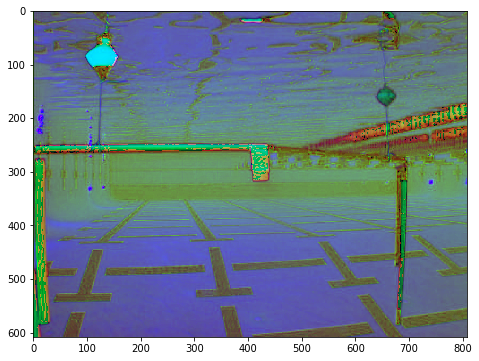

In [6]:
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HSV) )
plt.show()

# color filtering

### threshold values for RGB color space

In [7]:
## RGB
#lower_thresh = np.array([0, 0, 0])
#upper_thresh = np.array([100, 255, 255])

#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### threshold values for HSV color space

In [8]:
## HSV
lower_thresh = np.array([0, 0, 0]) # [0, 120, 0]
upper_thresh = np.array([180, 255, 60])

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# filter color

In [9]:
#img_color_filt, mask = color_filter(img, [lower_thresh, upper_thresh] )
img_color_filt, mask = color_filter(img_hsv, [lower_thresh, upper_thresh] )

# show filtered

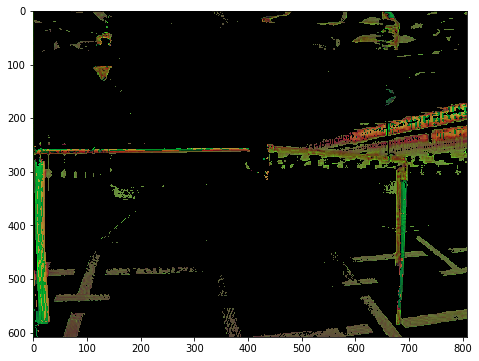

In [13]:
plt.figure(figsize=(10, 6) )
plt.imshow(img_color_filt) # original colorspace
plt.show()

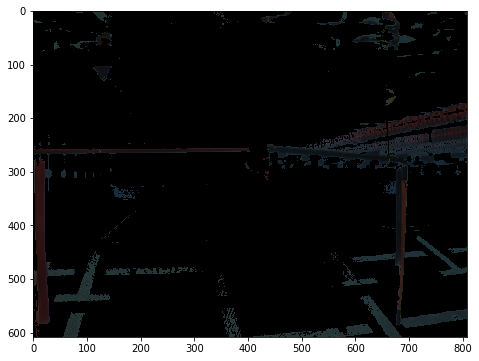

In [14]:
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img_color_filt, cv2.COLOR_HSV2RGB) )
plt.show()

## Morphs
1. erode
2. open
3. closing
4. dilation
5. gradient
6. tophat
7. blackhat

*basic kernel*

In [15]:
kernel = np.ones((5, 5), np.uint8)

### *erode - fade/trim*

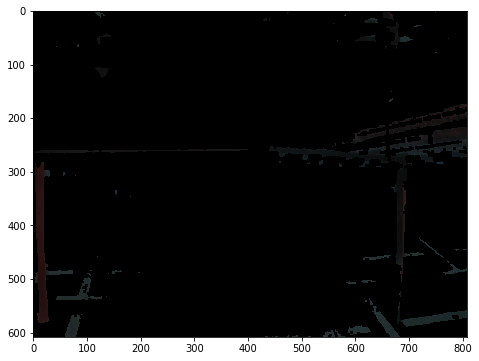

In [20]:
erode_morph = cv2.erode(img_color_filt, kernel, iterations=1)

plt.figure(figsize=(10, 6) )
#plt.imshow(erode_morph, cmap="gray")
plt.imshow(cv2.cvtColor(erode_morph, cv2.COLOR_HSV2RGB) )
plt.show()

### *open - remove specs (erosion followed by dilation)*

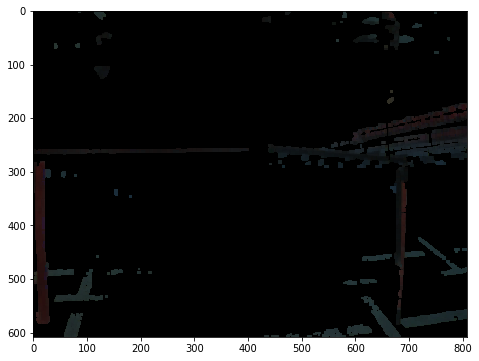

In [21]:
open_morph = cv2.morphologyEx(img_color_filt, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(10, 6) )
#plt.imshow(open_morph, cmap="gray")
plt.imshow(cv2.cvtColor(open_morph, cv2.COLOR_HSV2RGB) )
plt.show()

### *closing - fill in*

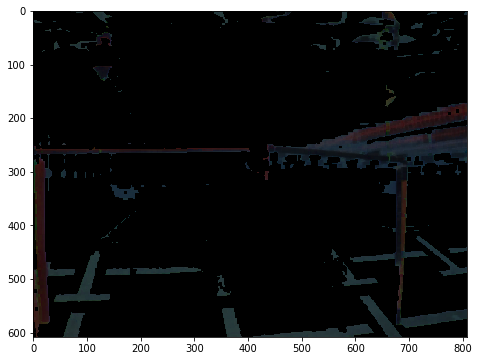

In [22]:
close_morph = cv2.morphologyEx(img_color_filt, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(10, 6) )
#plt.imshow(close_morph, cmap="gray")
plt.imshow(cv2.cvtColor(close_morph, cv2.COLOR_HSV2RGB) )
plt.show()

### *dilation - make chubby*

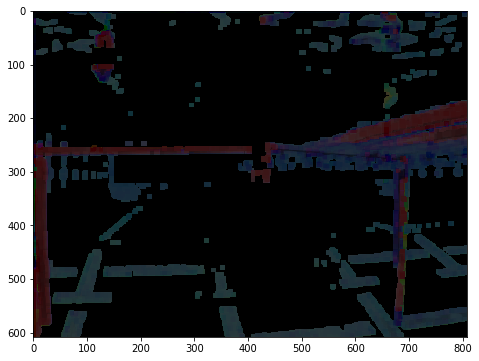

In [23]:
dilate_morph = cv2.dilate(img_color_filt, kernel, iterations=2)

plt.figure(figsize=(10, 6) )
#plt.imshow(dilate_morph, cmap="gray")
plt.imshow(cv2.cvtColor(dilate_morph, cv2.COLOR_HSV2RGB) )
plt.show()

### *gradient - diff bet'w dilation and erosion*

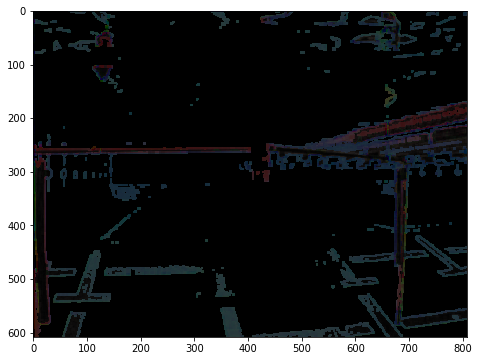

In [24]:
grad_morph = cv2.morphologyEx(img_color_filt, cv2.MORPH_GRADIENT, kernel)

plt.figure(figsize=(10, 6) )
#plt.imshow(grad_morph, cmap="gray")
plt.imshow(cv2.cvtColor(grad_morph, cv2.COLOR_HSV2RGB) )
plt.show()

### *top hat - diff bet'w input img and opening (remove specs)*

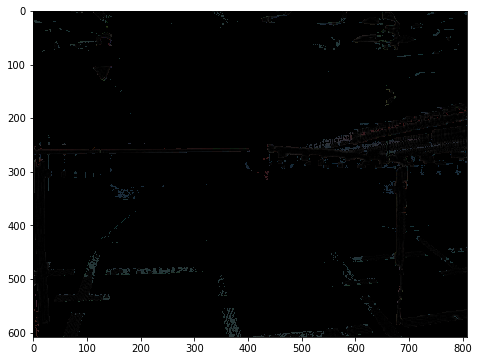

In [25]:
tophat_morph = cv2.morphologyEx(img_color_filt, cv2.MORPH_TOPHAT, kernel)

plt.figure(figsize=(10, 6) )
#plt.imshow(tophat_morph, cmap="gray")
plt.imshow(cv2.cvtColor(tophat_morph, cv2.COLOR_HSV2RGB) )
plt.show()

### *blackhat - diff bet'w closing and input img*

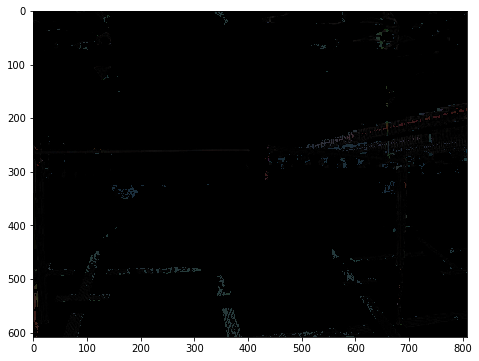

In [26]:
blackhat_morph = cv2.morphologyEx(img_color_filt, cv2.MORPH_BLACKHAT, kernel)

plt.figure(figsize=(10, 6) )
#plt.imshow(blackhat_morph, cmap="gray")
plt.imshow(cv2.cvtColor(blackhat_morph, cv2.COLOR_HSV2RGB) )
plt.show()

# MORPH combinations testing
---

*open -> dilate*

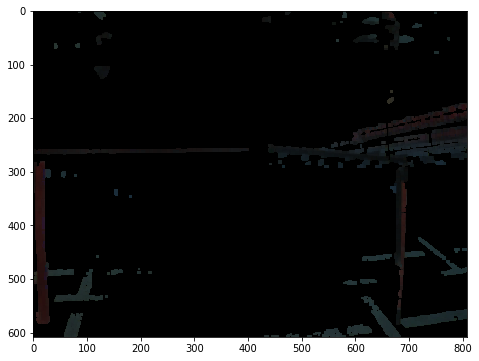

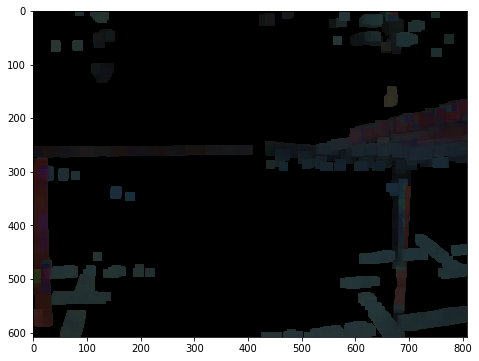

In [29]:
open_morph = cv2.morphologyEx(img_color_filt, cv2.MORPH_OPEN, kernel)
dilate_morph = cv2.dilate(open_morph, kernel, iterations=3)

plt.figure(figsize=(10, 6) )
#plt.imshow(open_morph, cmap="gray")
plt.imshow(cv2.cvtColor(open_morph, cv2.COLOR_HSV2RGB) )
plt.show()

plt.figure(figsize=(10, 6) )
#plt.imshow(dilate_morph, cmap="gray")
plt.imshow(cv2.cvtColor(dilate_morph, cv2.COLOR_HSV2RGB) )
plt.show()

*open -> close -> dilate*

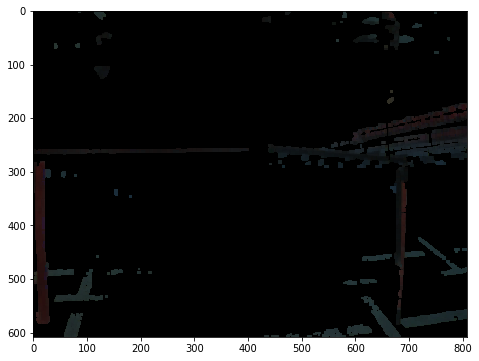

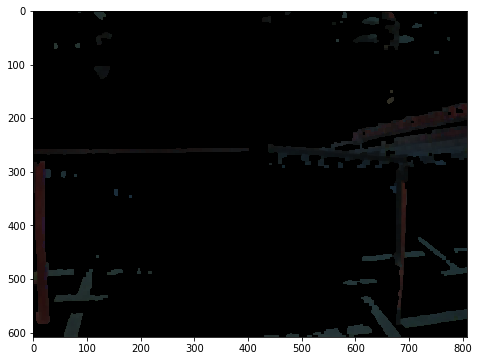

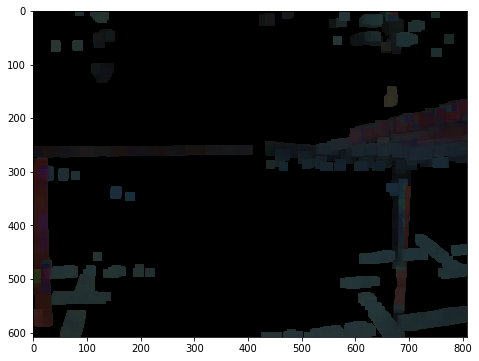

In [30]:
open_morph = cv2.morphologyEx(img_color_filt, cv2.MORPH_OPEN, kernel)
close_morph = cv2.morphologyEx(open_morph, cv2.MORPH_CLOSE, kernel)
dilate_morph = cv2.dilate(close_morph, kernel, iterations=3)

plt.figure(figsize=(10, 6) )
#plt.imshow(open_morph, cmap="gray")
plt.imshow(cv2.cvtColor(open_morph, cv2.COLOR_HSV2RGB) )
plt.show()

plt.figure(figsize=(10, 6) )
#plt.imshow(close_morph, cmap="gray")
plt.imshow(cv2.cvtColor(close_morph, cv2.COLOR_HSV2RGB) )
plt.show()

plt.figure(figsize=(10, 6) )
#plt.imshow(dilate_morph, cmap="gray")
plt.imshow(cv2.cvtColor(dilate_morph, cv2.COLOR_HSV2RGB) )
plt.show()

*close -> open -> dilate*

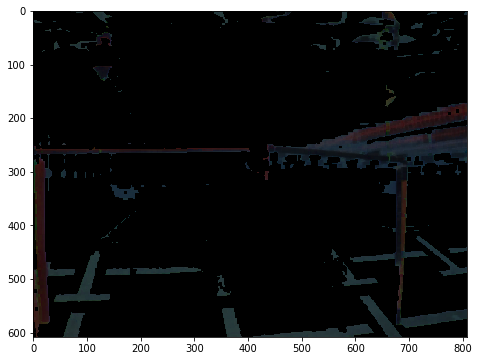

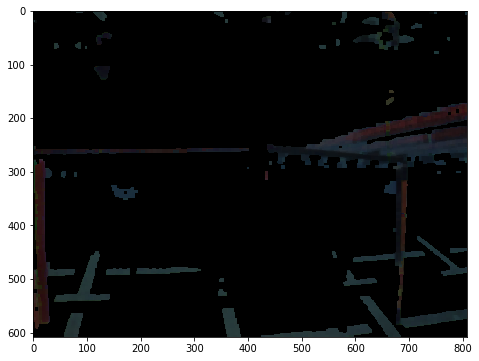

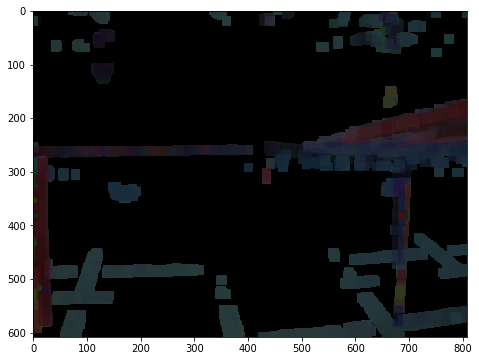

In [31]:
close_morph = cv2.morphologyEx(img_color_filt, cv2.MORPH_CLOSE, kernel)
open_morph = cv2.morphologyEx(close_morph, cv2.MORPH_OPEN, kernel)
dilate_morph = cv2.dilate(open_morph, kernel, iterations=3)

plt.figure(figsize=(10, 6) )
#plt.imshow(close_morph, cmap="gray")
plt.imshow(cv2.cvtColor(close_morph, cv2.COLOR_HSV2RGB) )
plt.show()

plt.figure(figsize=(10, 6) )
#plt.imshow(open_morph, cmap="gray")
plt.imshow(cv2.cvtColor(open_morph, cv2.COLOR_HSV2RGB) )
plt.show()

plt.figure(figsize=(10, 6) )
#plt.imshow(dilate_morph, cmap="gray")
plt.imshow(cv2.cvtColor(dilate_morph, cv2.COLOR_HSV2RGB) )
plt.show()

*close -> dilate*

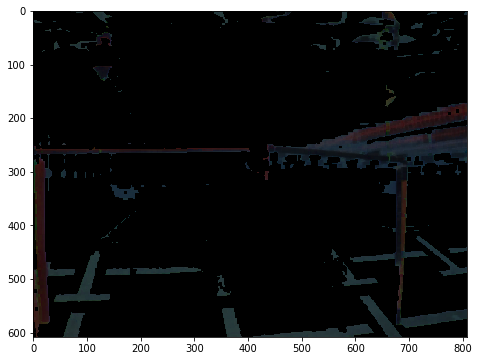

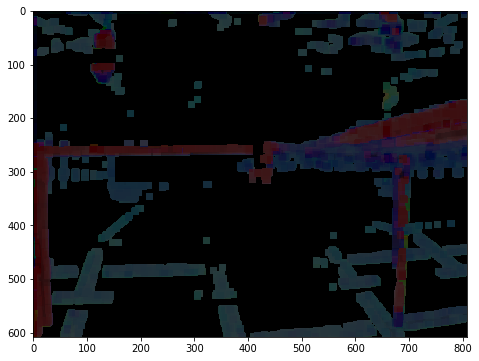

In [32]:
close_morph = cv2.morphologyEx(img_color_filt, cv2.MORPH_CLOSE, kernel)
#open_morph = cv2.morphologyEx(close_morph, cv2.MORPH_OPEN, kernel)
dilate_morph = cv2.dilate(close_morph, kernel, iterations=3)

plt.figure(figsize=(10, 6) )
#plt.imshow(close_morph, cmap="gray")
plt.imshow(cv2.cvtColor(close_morph, cv2.COLOR_HSV2RGB) )
plt.show()

plt.figure(figsize=(10, 6) )
#plt.imshow(dilate_morph, cmap="gray")
plt.imshow(cv2.cvtColor(dilate_morph, cv2.COLOR_HSV2RGB) )
plt.show()

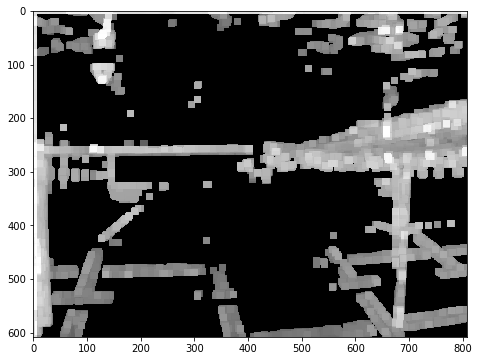

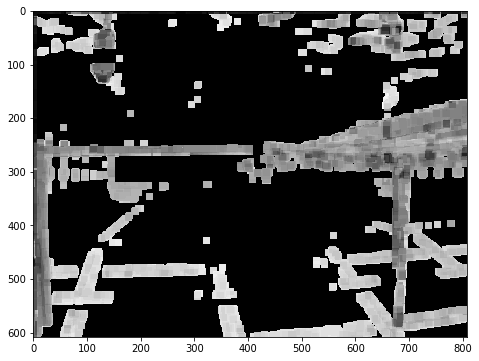

In [33]:
vid_hsv2bgr = cv2.cvtColor(dilate_morph, cv2.COLOR_HSV2BGR)
img_gray_bgr = cv2.cvtColor(vid_hsv2bgr, cv2.COLOR_BGR2GRAY)

img_gray_hsv = cv2.cvtColor(dilate_morph, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 6) )
plt.imshow(img_gray_hsv, cmap="gray")
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(img_gray_bgr, cmap="gray")
plt.show()

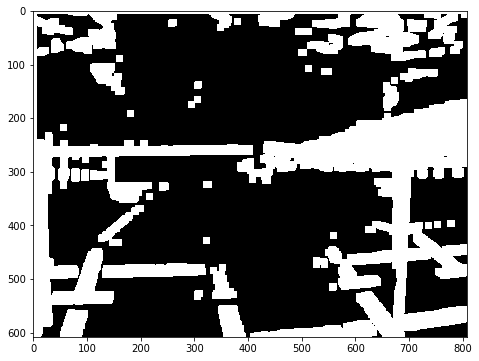

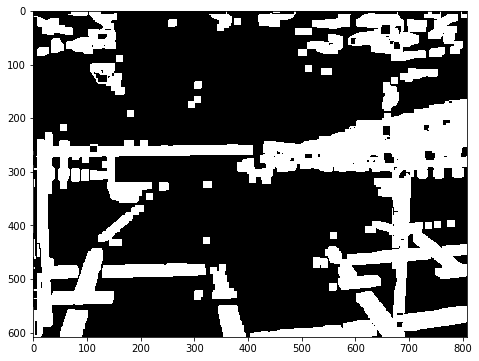

In [34]:
ret_1, img_thresh_1 = cv2.threshold(img_gray_hsv, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret_2, img_thresh_2 = cv2.threshold(img_gray_bgr, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#ret_1, img_thresh_1 = cv2.threshold(img_gray_1, 127, 255, cv2.THRESH_BINARY)
#ret_2, img_thresh_2 = cv2.threshold(img_gray_2, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 6) )
plt.imshow(img_thresh_1, cmap="gray")
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(img_thresh_2, cmap="gray")
plt.show()

In [35]:
#img1_c, img1_contours, img1_heirarchy = cv2.findContours(img_gray_1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#img2_c, img2_contours, img2_heirarchy = cv2.findContours(img_gray_2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img1_c, img1_contours, img1_heirarchy = cv2.findContours(img_thresh_1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img2_c, img2_contours, img2_heirarchy = cv2.findContours(img_thresh_2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#print(len(img1_contours))
#print(len(img2_contours))

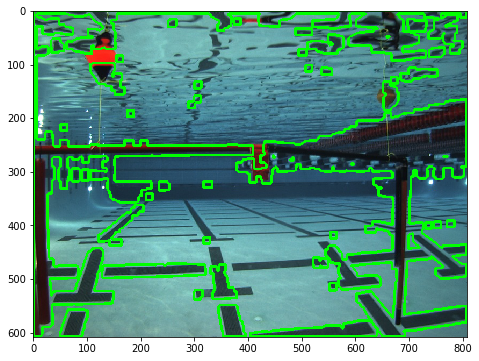

In [36]:
threshold_color = [0, 255, 0] # green

img_copy = img.copy()
#print(len(conts))
#print(len(filt_cont) )

cv2.drawContours(img_copy, img1_contours, -1, threshold_color, 3)
#cv2.drawContours(img_copy, filt_cont, 0, threshold_color, 3) # 5

plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB) )
plt.show()

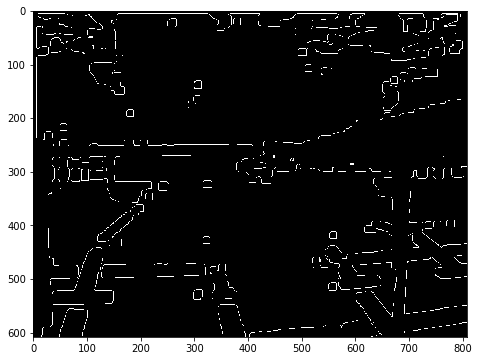

In [37]:
edges = cv2.Canny(img_thresh_1, 150, 255, apertureSize=5)

plt.figure(figsize=(10, 6) )
plt.imshow(edges, cmap="gray")
plt.show()

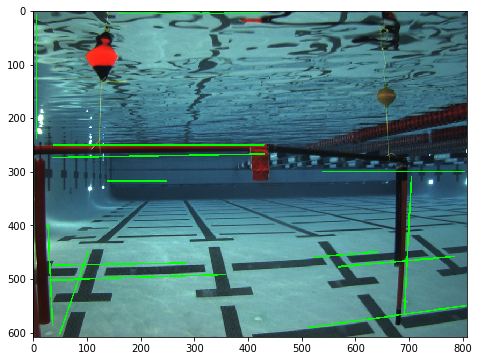

In [38]:
img_copy = img.copy()


lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=50, maxLineGap=50)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB) )
plt.show()

In [39]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

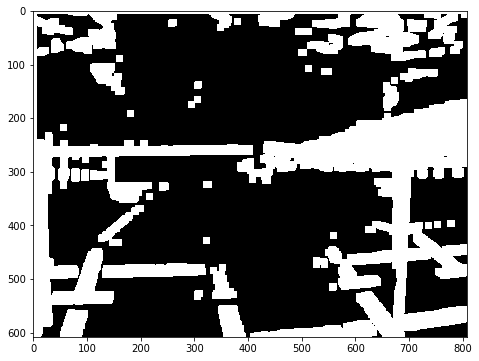

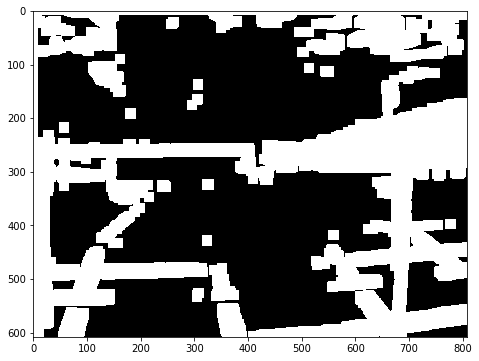

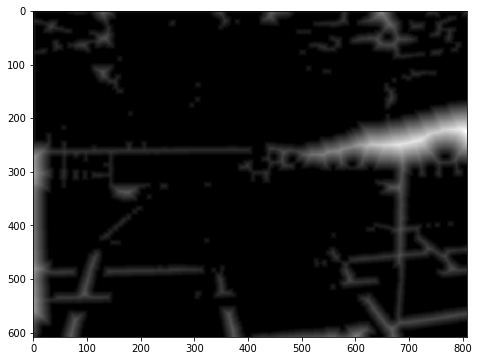

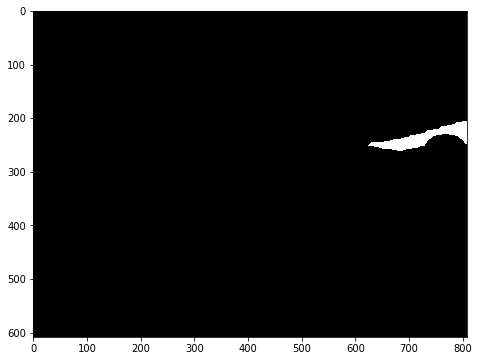

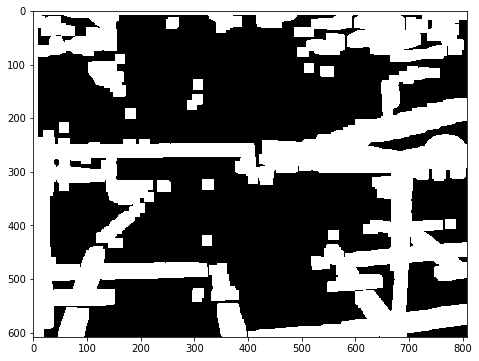

In [40]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img_thresh_1,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)


plt.figure(figsize=(10, 6) )
plt.imshow(opening, cmap="gray")
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(sure_bg, cmap="gray")
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(dist_transform, cmap="gray")
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(sure_fg, cmap="gray")
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(unknown, cmap="gray")
plt.show()

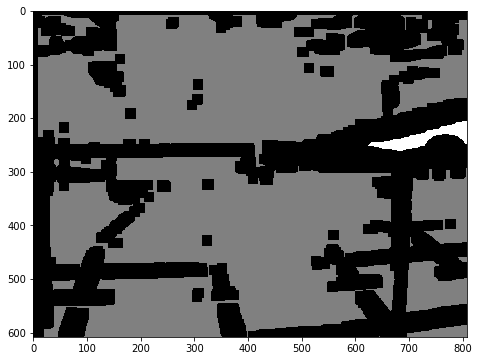

In [41]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.figure(figsize=(10, 6) )
plt.imshow(markers, cmap="gray")
#plt.imshow(cv2.cvtColor(markers, cv2.COLOR_BGR2RGB) )
plt.show()

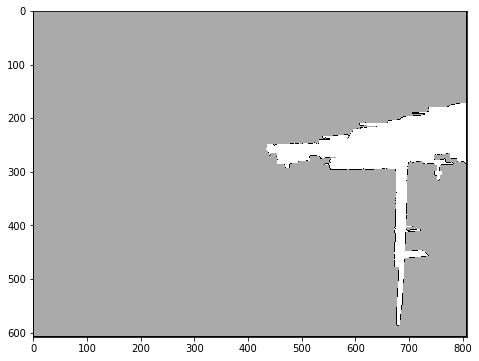

In [42]:
img_copy = img.copy()

markers = cv2.watershed(img_copy, markers)
img_copy[markers == -1] = [255, 255, 255]

plt.figure(figsize=(10, 6) )
plt.imshow(markers, cmap="gray")
#plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB) )
plt.show()

In [44]:
ret, thresh = cv2.threshold(markers, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

error: OpenCV(3.4.1) /tmp/opencv-20180529-55469-97fkx6/opencv-3.4.1/modules/imgproc/src/thresh.cpp:1406: error: (-215) src.type() == (((0) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function threshold
